In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [100]:
X,y = make_moons(n_samples=500,noise=0.3,random_state=0)

In [101]:
type(X)

numpy.ndarray

In [102]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [103]:
X_train.shape,y_train.shape,X_test.shape

((400, 2), (400,), (100, 2))

In [104]:
X.shape,y.shape

((500, 2), (500,))

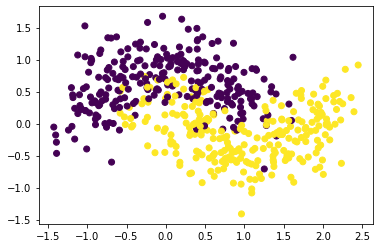

In [105]:
plt.scatter(X[:,0],X[:,1],c=y)

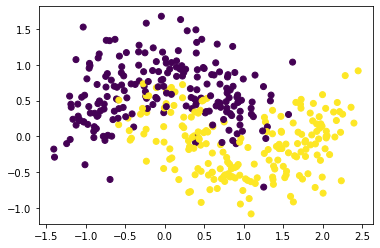

In [106]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train)

In [107]:
#utilisons les methodes d'ensemble learning
#Random forest
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

In [108]:
model_1=SGDClassifier()
model_2=DecisionTreeClassifier()
model_3=KNeighborsClassifier()
model_4 = VotingClassifier([('SGD',model_1),('DTC',model_2),('KNN',model_3)],voting='hard')

In [109]:
models =[model_1,model_2,model_3,model_4]
scores=[]
for model in models:
    model.fit(X_train,y_train)
    scores.append(model.score(X_test,y_test))
    print(model.__class__.__name__, model.score(X_test,y_test))

SGDClassifier 0.86
DecisionTreeClassifier 0.85
KNeighborsClassifier 0.89
VotingClassifier 0.91


In [110]:
print(scores)

[0.86, 0.85, 0.89, 0.91]


In [111]:
#bagging

In [112]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier

In [119]:
md = BaggingClassifier(base_estimator='KNeighborsClassifier()',n_estimators=100)
#md.fit(X_train,y_train)

In [ ]:
model.fit(X_train,y_train)

In [121]:
model=RandomForestClassifier(n_estimators=100)

In [122]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [123]:
model.score(X_test,y_test)

0.92

In [124]:
#boosting
from  sklearn.ensemble import AdaBoostClassifier

In [125]:
model=AdaBoostClassifier(n_estimators=100)

In [126]:
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [128]:
model.score(X_test,y_test)

0.86

In [129]:
from sklearn.ensemble import StackingClassifier

In [131]:
model = StackingClassifier([('KNN',KNeighborsClassifier()),('DTC',DecisionTreeClassifier()),('SGD',SGDClassifier())],final_estimator=KNeighborsClassifier())

In [132]:
model.fit(X_train,y_train)

StackingClassifier(estimators=[('KNN', KNeighborsClassifier()),
                               ('DTC', DecisionTreeClassifier()),
                               ('SGD', SGDClassifier())],
                   final_estimator=KNeighborsClassifier())

In [133]:
model.score(X_test,y_test)

0.91